In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# I will be Following the data scince process
## 1.Business Understanding
## 2.Data Understanding
## 3.Modeling
## 4.Evaluation
## 5.Deployment

In [4]:
df=pd.read_csv('jersey city airbnb listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,40669,https://www.airbnb.com/rooms/40669,20211220161334,2021-12-21,Skyy’s Lounge / Cozy,<b>The space</b><br />Skyy’s Lounge ....Everyt...,The neighborhood is very diverse & friendly sh...,https://a0.muscache.com/pictures/af7e4a45-0118...,175412,https://www.airbnb.com/users/show/175412,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.07
1,215768,https://www.airbnb.com/rooms/215768,20211220161334,2021-12-21,Minutes to Manhattan & Jersey Shore,Walking to distance to Statue of Liberty and E...,"Such close proximity to NYC, 7 minutes on the ...",https://a0.muscache.com/pictures/miso/Hosting-...,846837,https://www.airbnb.com/users/show/846837,...,4.90,4.31,4.80,STR20-00055,f,1,1,0,0,1.10
2,269266,https://www.airbnb.com/rooms/269266,20211220161334,2021-12-20,Modern private 2 bedrooms apt minutes to NYC,Enjoy that private luxury two bedrooms apartme...,Our House is located in the Liberty State Park...,https://a0.muscache.com/pictures/5c8382e2-d2d8...,1410590,https://www.airbnb.com/users/show/1410590,...,4.65,3.80,4.44,NaN,t,8,1,7,0,3.10
3,270245,https://www.airbnb.com/rooms/270245,20211220161334,2021-12-22,Private room with own bathroom close to NYC,Just for you small bedroom with private bathro...,NaN,https://a0.muscache.com/pictures/83004bc4-6ff2...,1410590,https://www.airbnb.com/users/show/1410590,...,4.68,3.89,4.57,NaN,t,8,1,7,0,2.04
4,271255,https://www.airbnb.com/rooms/271255,20211220161334,2021-12-22,Large Room with private bathroom min to Manhattan,You can enjoy your stay in large bedroom with ...,NaN,https://a0.muscache.com/pictures/26d49bd9-efe3...,1410590,https://www.airbnb.com/users/show/1410590,...,4.56,3.76,4.37,NaN,t,8,1,7,0,2.43


In [5]:
df.shape

(1001, 74)

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# Business Understanding
### 1)What are the most popular neighborhoods for Airbnb listings in Jersey City?
### 2)Is there a correlation between the price of a listing and the number of reviews it has received?
### 3)How do the amenities and features of Jersey City Airbnb listings, such as the presence of a pool, gym, or free parking, impact the price and popularity of the listing?

# Data Understanding
## Data Preparation
- I will prepare the data for analysis by selecting the relevant columns and creating a new dataframe.
- I will remove any unnecessary columns from the original dataframe to keep it clean and focused

In [7]:
relevant_columns = ['id', 'neighbourhood', 'neighbourhood_cleansed','latitude','longitude','price', 'number_of_reviews',
                    'review_scores_rating', 'amenities', 'host_response_time',
                    'host_is_superhost', 'bedrooms', 'bathrooms', 'beds',
                    'property_type', 'room_type', 'instant_bookable','availability_365'
                    ]
airbnb_df = df[relevant_columns]

In [8]:
airbnb_df.describe()

,id,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,bathrooms,beds,availability_365
count,1.001000e+03,1001.000000,1001.000000,1001.000000,737.000000,933.000000,0.0,981.00000,1001.000000
mean,3.568748e+07,40.725206,-74.057730,28.969031,4.635156,1.614148,NaN,2.06524,209.406593
std,1.553927e+07,0.013781,0.017792,55.567761,0.600365,1.010191,NaN,1.50842,136.184616
min,4.066900e+04,40.680595,-74.106990,0.000000,0.000000,1.000000,NaN,1.00000,0.000000
25%,2.319890e+07,40.717090,-74.071460,0.000000,4.530000,1.000000,NaN,1.00000,76.000000
50%,3.977404e+07,40.723980,-74.053690,5.000000,4.770000,1.000000,NaN,2.00000,205.000000
75%,5.000920e+07,40.733480,-74.043180,29.000000,5.000000,2.000000,NaN,3.00000,353.000000
max,5.389060e+07,40.760700,-74.029390,386.000000,5.000000,10.000000,NaN,12.00000,365.000000


## Missing Values
- I will check the percentage of missing values in the dataset to understand the extent of missing data.
- Based on the results, I will decide if any missing values need to be removed before proceeding with the analysis.

In [9]:
airbnb_df.isnull().sum()

id                           0
neighbourhood              366
neighbourhood_cleansed       0
latitude                     0
longitude                    0
price                        0
number_of_reviews            0
review_scores_rating       264
amenities                    0
host_response_time          76
host_is_superhost            0
bedrooms                    68
bathrooms                 1001
beds                        20
property_type                0
room_type                    0
instant_bookable             0
availability_365             0
dtype: int64

## Handling Missing Values
- I have identified that a significant portion of my review data is missing.
- To address this, I will create a new dataframe containing only the rows with non-null review values.

In [10]:
all_null_review_df=airbnb_df[(airbnb_df.iloc[:,14:].isnull()).all(1)]

In [11]:
all_null_review_df.isnull().sum()

id                        0
neighbourhood             0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
price                     0
number_of_reviews         0
review_scores_rating      0
amenities                 0
host_response_time        0
host_is_superhost         0
bedrooms                  0
bathrooms                 0
beds                      0
property_type             0
room_type                 0
instant_bookable          0
availability_365          0
dtype: int64

In [12]:
all_null_review_df.isnull().all()

id                        True
neighbourhood             True
neighbourhood_cleansed    True
latitude                  True
longitude                 True
price                     True
number_of_reviews         True
review_scores_rating      True
amenities                 True
host_response_time        True
host_is_superhost         True
bedrooms                  True
bathrooms                 True
beds                      True
property_type             True
room_type                 True
instant_bookable          True
availability_365          True
dtype: bool

## Handling Missing Values
- I have identified that 264 rows have missing values in the review column and all the rows with the bathroom column are null.
- As a result, I have decided to drop these rows from the dataframe for the following reasons:
    1) It is not possible to make predictions on missing data.
    2) Using this data in visualizations could skew the results.
    3) Imputing the data could introduce bias in the models.

In [13]:
#new_df.drop(new_df[new_df.iloc[:,14:].isnull().all(1)])
#newer_df=new_df.dropna(subset=[iloc[:,14:].dropna(how='all').copy()
cleaned_airbnb_df=airbnb_df.dropna(subset=['review_scores_rating']).copy()
cleaned_airbnb_df = airbnb_df.drop('bathrooms', axis=1)

In [14]:
cleaned_airbnb_df

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,review_scores_rating,amenities,host_response_time,host_is_superhost,bedrooms,beds,property_type,room_type,instant_bookable,availability_365
0,40669,"Jersey City, New Jersey, United States",Ward C (councilmember Richard Boggiano),40.73742,-74.05255,$128.00,10,5.00,"[""TV with standard cable"", ""Children\u2019s di...",a few days or more,f,1.0,1.0,Private room in condominium (condo),Private room,f,74
1,215768,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),40.71663,-74.05799,$111.00,137,4.76,"[""TV with standard cable"", ""Private entrance"",...",within an hour,t,1.0,2.0,Entire residential home,Entire home/apt,f,353
2,269266,"Jersey City, New Jersey, United States",Ward F (councilmember Jermaine D. Robinson),40.71266,-74.06329,$109.00,380,4.34,"[""Private entrance"", ""Safe"", ""Portable fans"", ...",within an hour,f,2.0,3.0,Entire rental unit,Entire home/apt,t,348
3,270245,NaN,Ward F (councilmember Jermaine D. Robinson),40.71203,-74.06532,$46.00,249,4.50,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.0,1.0,Private room in townhouse,Private room,t,292
4,271255,NaN,Ward F (councilmember Jermaine D. Robinson),40.71258,-74.06284,$62.00,286,4.38,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.0,3.0,Private room in townhouse,Private room,t,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,53831782,"Union City, New Jersey, United States",Ward D (councilmember Michael Yun),40.76070,-74.04303,$96.00,0,NaN,"[""Private entrance"", ""Paid parking lot on prem...",within a few hours,f,3.0,5.0,Entire residential home,Entire home/apt,t,335
997,53834917,NaN,Ward E (councilmember James Solomon),40.71918,-74.03405,$129.00,2,5.00,"[""Private entrance"", ""Outdoor dining area"", ""D...",within an hour,f,1.0,2.0,Entire rental unit,Entire home/apt,t,350
998,53849201,NaN,Ward C (councilmember Richard Boggiano),40.73516,-74.06379,$191.00,0,NaN,"[""Private entrance"", ""Dishwasher"", ""Extra pill...",within an hour,f,1.0,1.0,Entire serviced apartment,Entire home/apt,t,365
999,53858569,"Jersey City, New Jersey, United States",Ward E (councilmember James Solomon),40.71510,-74.04845,$216.00,2,5.00,"[""Safe"", ""Dishwasher"", ""Extra pillows and blan...",within an hour,t,1.0,1.0,Entire condominium (condo),Entire home/apt,f,88


In [15]:
cleaned_airbnb_df.isnull().sum()

id                          0
neighbourhood             366
neighbourhood_cleansed      0
latitude                    0
longitude                   0
price                       0
number_of_reviews           0
review_scores_rating      264
amenities                   0
host_response_time         76
host_is_superhost           0
bedrooms                   68
beds                       20
property_type               0
room_type                   0
instant_bookable            0
availability_365            0
dtype: int64

## Handling Missing Values
- I have identified that there are several rows with missing values across multiple columns.
- I will first handle the 'review_rating_rating' column by imputing 0 for the missing values.

In [16]:
num_missing = cleaned_airbnb_df['review_scores_rating'].isnull().sum()
num_missing

264

In [17]:
cleaned_airbnb_df['review_scores_rating'].fillna(0, inplace=True)

## Handling Missing Values
- Next are the 'bedrooms' and 'beds' which i will fill with the averges of their respected columns

In [18]:
# Fill missing values in the bedrooms column with its mean value
mean_bedrooms = cleaned_airbnb_df['bedrooms'].mean()
cleaned_airbnb_df['bedrooms'].fillna(mean_bedrooms, inplace=True)

# Fill missing values in the beds column with its mean value
mean_beds = cleaned_airbnb_df['beds'].mean()
cleaned_airbnb_df['beds'].fillna(mean_beds, inplace=True)

# Check the number of missing values in the bedrooms and beds columns after filling with mean values
print(cleaned_airbnb_df['bedrooms'].isnull().sum())
print(cleaned_airbnb_df['beds'].isnull().sum())

0
0


## Handling Missing Values
- I have finished addressing missing values in the review columns.
- Next, I will move on to the city column to check for any missing values and take appropriate action.

In [19]:
cleaned_airbnb_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    629
Bayonne, New Jersey, United States          2
Union City, New Jersey, United States       2
Hoboken, New Jersey, United States          1
泽西城, New Jersey, United States              1
Name: neighbourhood, dtype: int64

In [20]:
(cleaned_airbnb_df.neighbourhood=='Jersey City, New Jersey, United States').sum()

629

## Handling Missing Values
- I have identified that the neighbourhood column has 366 missing values.
- Instead of dropping those rows and introducing selection bias, I will use the latitude and longitude coordinates to fill in the missing values with the city the property is located in.
- To do this, I will use the latitude and longitude coordinates to return the full address of the property and then strip it to only return the city and state.

In [21]:
nan_neighbourhood=cleaned_airbnb_df[cleaned_airbnb_df['neighbourhood'].isnull()].copy()

In [22]:
nan_neighbourhood

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,review_scores_rating,amenities,host_response_time,host_is_superhost,bedrooms,beds,property_type,room_type,instant_bookable,availability_365
3,270245,NaN,Ward F (councilmember Jermaine D. Robinson),40.71203,-74.06532,$46.00,249,4.50,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.000000,1.0,Private room in townhouse,Private room,t,292
4,271255,NaN,Ward F (councilmember Jermaine D. Robinson),40.71258,-74.06284,$62.00,286,4.38,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.000000,3.0,Private room in townhouse,Private room,t,347
5,508581,NaN,Ward E (councilmember James Solomon),40.71979,-74.04549,$139.00,56,4.44,"[""Heating"", ""Wifi"", ""Carbon monoxide alarm"", ""...",within an hour,f,1.000000,2.0,Entire rental unit,Entire home/apt,f,235
13,1014258,NaN,Ward C (councilmember Richard Boggiano),40.73765,-74.04952,$100.00,9,4.56,"[""TV with standard cable"", ""Private patio or b...",NaN,f,2.000000,3.0,Entire condominium (condo),Entire home/apt,f,186
14,1276863,NaN,Ward E (councilmember James Solomon),40.71355,-74.03374,$191.00,145,4.78,"[""Heating"", ""Essentials"", ""Wifi"", ""Carbon mono...",within a day,f,2.000000,2.0,Entire rental unit,Entire home/apt,f,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,53812669,NaN,Ward F (councilmember Jermaine D. Robinson),40.70951,-74.07667,$86.00,0,0.00,"[""Body soap"", ""Bed linens"", ""Air conditioning""...",within an hour,f,1.000000,1.0,Private room in rental unit,Private room,t,359
995,53827593,NaN,Ward E (councilmember James Solomon),40.72284,-74.03714,$100.00,0,0.00,"[""Pool table"", ""Wifi"", ""Fire pit"", ""Carbon mon...",within a few hours,f,1.614148,1.0,Entire rental unit,Entire home/apt,t,305
997,53834917,NaN,Ward E (councilmember James Solomon),40.71918,-74.03405,$129.00,2,5.00,"[""Private entrance"", ""Outdoor dining area"", ""D...",within an hour,f,1.000000,2.0,Entire rental unit,Entire home/apt,t,350
998,53849201,NaN,Ward C (councilmember Richard Boggiano),40.73516,-74.06379,$191.00,0,0.00,"[""Private entrance"", ""Dishwasher"", ""Extra pill...",within an hour,f,1.000000,1.0,Entire serviced apartment,Entire home/apt,t,365


In [23]:
nan_neighbourhood['neighbourhood'].isnull().sum()

366

- Before using the latitude and longitude coordinates to fill in the missing values, I will ensure that there are no missing values in the latitude and longitude columns.

In [24]:
nan_neighbourhood[['latitude','longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

## Handling Missing Values
- I have ensured that there are no missing values in the latitude and longitude columns.
- I will now use the geocoders library to reverse search each latitude and longitude pair and return only the city name.
- This city name will be used to fill in the missing values in the neighbourhood column.

In [25]:
from geopy.geocoders import Nominatim

In [26]:
geolocator= Nominatim(user_agent='http')
location = geolocator.reverse('40.71355,-74.03374')
print(location.raw.get('address').get('city'))

Jersey City


In [27]:
import geocoder
def geo_rev(x):
    g = geocoder.osm([x.latitude,x.longitude], method='reverse').json
    if g:
        return g.get('city')
    else:
        return 'Nothing'
    
""" running the function by entering the latitude and longitude coordinantes and returning only the city, 
    the applying to the 'neighbourhood' column"""

nan_neighbourhood.neighbourhood=nan_neighbourhood[['latitude','longitude']].apply(geo_rev,axis=1)

In [28]:
nan_neighbourhood

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,review_scores_rating,amenities,host_response_time,host_is_superhost,bedrooms,beds,property_type,room_type,instant_bookable,availability_365
3,270245,Jersey City,Ward F (councilmember Jermaine D. Robinson),40.71203,-74.06532,$46.00,249,4.50,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.000000,1.0,Private room in townhouse,Private room,t,292
4,271255,Jersey City,Ward F (councilmember Jermaine D. Robinson),40.71258,-74.06284,$62.00,286,4.38,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.000000,3.0,Private room in townhouse,Private room,t,347
5,508581,Jersey City,Ward E (councilmember James Solomon),40.71979,-74.04549,$139.00,56,4.44,"[""Heating"", ""Wifi"", ""Carbon monoxide alarm"", ""...",within an hour,f,1.000000,2.0,Entire rental unit,Entire home/apt,f,235
13,1014258,Jersey City,Ward C (councilmember Richard Boggiano),40.73765,-74.04952,$100.00,9,4.56,"[""TV with standard cable"", ""Private patio or b...",NaN,f,2.000000,3.0,Entire condominium (condo),Entire home/apt,f,186
14,1276863,Jersey City,Ward E (councilmember James Solomon),40.71355,-74.03374,$191.00,145,4.78,"[""Heating"", ""Essentials"", ""Wifi"", ""Carbon mono...",within a day,f,2.000000,2.0,Entire rental unit,Entire home/apt,f,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,53812669,Jersey City,Ward F (councilmember Jermaine D. Robinson),40.70951,-74.07667,$86.00,0,0.00,"[""Body soap"", ""Bed linens"", ""Air conditioning""...",within an hour,f,1.000000,1.0,Private room in rental unit,Private room,t,359
995,53827593,Jersey City,Ward E (councilmember James Solomon),40.72284,-74.03714,$100.00,0,0.00,"[""Pool table"", ""Wifi"", ""Fire pit"", ""Carbon mon...",within a few hours,f,1.614148,1.0,Entire rental unit,Entire home/apt,t,305
997,53834917,Jersey City,Ward E (councilmember James Solomon),40.71918,-74.03405,$129.00,2,5.00,"[""Private entrance"", ""Outdoor dining area"", ""D...",within an hour,f,1.000000,2.0,Entire rental unit,Entire home/apt,t,350
998,53849201,Jersey City,Ward C (councilmember Richard Boggiano),40.73516,-74.06379,$191.00,0,0.00,"[""Private entrance"", ""Dishwasher"", ""Extra pill...",within an hour,f,1.000000,1.0,Entire serviced apartment,Entire home/apt,t,365


## Handling Missing Values
- I have used the geocoders library to obtain the city names for the missing values in the neighbourhood column.
- I will now use these city names to fill in the missing values in the neighbourhood column of the original dataframe.

In [29]:
cleaned_airbnb_df.neighbourhood.fillna(nan_neighbourhood.neighbourhood,inplace=True)

In [30]:
cleaned_airbnb_df.neighbourhood.value_counts()

Jersey City, New Jersey, United States    629
Jersey City                               361
Bayonne, New Jersey, United States          2
Union City, New Jersey, United States       2
Hoboken, New Jersey, United States          1
泽西城, New Jersey, United States              1
Name: neighbourhood, dtype: int64

- I have filled in the missing values in the neighbourhood column using city names obtained from the geocoders library.
- However, I noticed that some of the filled values include both city and state information.
- To maintain consistency in the data, I will extract only 'Jersey City' 

In [31]:
cleaned_airbnb_df.neighbourhood=cleaned_airbnb_df.neighbourhood.str[:11]

In [32]:
cleaned_airbnb_df.neighbourhood.value_counts()

Jersey City    990
Bayonne, Ne      2
Union City,      2
泽西城, New Je      1
Hoboken, Ne      1
Name: neighbourhood, dtype: int64

- Now, I will filter the dataset to only keep the rows that contain 'Jersey City' in the neighbourhood column.

In [33]:
cleaned_airbnb_df.drop(cleaned_airbnb_df[cleaned_airbnb_df.neighbourhood !='Jersey City'].index,inplace=True)

In [34]:
cleaned_airbnb_df.neighbourhood.value_counts()

Jersey City    990
Name: neighbourhood, dtype: int64

In [35]:
cleaned_airbnb_df.neighbourhood_cleansed.value_counts()

Ward E (councilmember James Solomon)           357
Ward C (councilmember Richard Boggiano)        177
Ward F (councilmember Jermaine D. Robinson)    171
Ward D (councilmember Michael Yun)             136
Ward B (councilmember Mira Prinz-Arey)          82
Ward A (councilmember Denise Ridley)            67
Name: neighbourhood_cleansed, dtype: int64

## Moving onto the Price column
## Handling Data Types
- I have identified that the 'price' column is missing when using the pandas "describe" method.
- Upon further investigation, I have found that the column is an 'object' (string) data type instead of numerical.
- I will now convert the data type of the 'price' column to numerical to be able to perform calculations on it.

In [36]:
cleaned_airbnb_df.price.dtypes

dtype('O')

In [37]:
cleaned_airbnb_df.price

0       $128.00
1       $111.00
2       $109.00
3        $46.00
4        $62.00
         ...   
995     $100.00
997     $129.00
998     $191.00
999     $216.00
1000     $40.00
Name: price, Length: 990, dtype: object

- I have identified that the 'price' column is an 'object' (string) data type instead of numerical.
- To convert the data type of the 'price' column to numerical, I will first remove the '$' from in front of each number, and then convert them into integers.

In [38]:
# I notices that the price is an object because it has the '$' in front so i will change that to a int

cleaned_airbnb_df['price']=cleaned_airbnb_df['price'].str.replace('$','')
cleaned_airbnb_df['price']=cleaned_airbnb_df['price'].str.replace(',','').astype('float').astype('int64')

In [39]:
cleaned_airbnb_df.price

0       128
1       111
2       109
3        46
4        62
       ... 
995     100
997     129
998     191
999     216
1000     40
Name: price, Length: 990, dtype: int64

## Next is the property types column

In [40]:
cleaned_airbnb_df.property_type.value_counts()

Entire rental unit                     453
Private room in rental unit            124
Private room in residential home       119
Entire condominium (condo)              67
Entire serviced apartment               63
Entire residential home                 50
Private room in condominium (condo)     24
Private room in townhouse               18
Entire townhouse                        17
Room in hotel                           14
Entire guest suite                      12
Entire loft                              8
Private room in loft                     5
Private room in guest suite              3
Room in boutique hotel                   3
Private room in bed and breakfast        2
Boat                                     1
Tiny house                               1
Room in serviced apartment               1
Entire home/apt                          1
Private room in serviced apartment       1
Entire vacation home                     1
Shared room in rental unit               1
Entire plac

In [41]:
cleaned_airbnb_df.property_type=cleaned_airbnb_df.property_type.replace("(\(condo)\)",'',regex=True)

In [42]:
cleaned_airbnb_df.property_type.value_counts()

Entire rental unit                    453
Private room in rental unit           124
Private room in residential home      119
Entire condominium                     67
Entire serviced apartment              63
Entire residential home                50
Private room in condominium            24
Private room in townhouse              18
Entire townhouse                       17
Room in hotel                          14
Entire guest suite                     12
Entire loft                             8
Private room in loft                    5
Private room in guest suite             3
Room in boutique hotel                  3
Private room in bed and breakfast       2
Room in serviced apartment              1
Tiny house                              1
Private room in serviced apartment      1
Entire vacation home                    1
Shared room in rental unit              1
Boat                                    1
Entire place                            1
Entire home/apt                   

In [43]:
cleaned_airbnb_df.property_type.nunique()

24

In [44]:
cleaned_airbnb_df['amenities_count']=cleaned_airbnb_df.amenities.str.count(",")

In [45]:
cleaned_airbnb_df.describe()

,id,latitude,longitude,price,number_of_reviews,review_scores_rating,bedrooms,beds,availability_365,amenities_count
count,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.00000,990.000000
mean,3.559240e+07,40.725205,-74.057661,158.626263,29.236364,3.422293,1.603800,2.050813,208.59899,30.376768
std,1.550896e+07,0.013510,0.017611,155.653792,55.813595,2.102749,0.963814,1.470481,136.16172,12.710690
min,4.066900e+04,40.687720,-74.106990,19.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000
25%,2.318867e+07,40.717132,-74.071360,70.250000,0.000000,0.000000,1.000000,1.000000,76.00000,22.000000
50%,3.968886e+07,40.723960,-74.053815,120.000000,5.000000,4.620000,1.000000,2.000000,203.50000,29.000000
75%,4.987383e+07,40.733398,-74.043312,203.000000,29.000000,4.900000,2.000000,2.065240,353.00000,38.750000
max,5.389060e+07,40.759320,-74.029390,2000.000000,386.000000,5.000000,10.000000,12.000000,365.00000,72.000000


In [46]:
cleaned_airbnb_df[cleaned_airbnb_df.price==1321]

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,review_scores_rating,amenities,host_response_time,host_is_superhost,bedrooms,beds,property_type,room_type,instant_bookable,availability_365,amenities_count
625,45462173,Jersey City,Ward E (councilmember James Solomon),40.72267,-74.04726,1321,1,5.0,"[""Private entrance"", ""First aid kit"", ""Dishwas...",within an hour,f,8.0,12.0,Entire townhouse,Entire home/apt,f,314,42


In [47]:
cleaned_airbnb_df[cleaned_airbnb_df.price==19]

,id,neighbourhood,neighbourhood_cleansed,latitude,longitude,price,number_of_reviews,review_scores_rating,amenities,host_response_time,host_is_superhost,bedrooms,beds,property_type,room_type,instant_bookable,availability_365,amenities_count
535,41079113,Jersey City,Ward D (councilmember Michael Yun),40.74908,-74.04942,19,2,5.0,"[""Smoke alarm"", ""Hangers"", ""Hot water"", ""Fire ...",a few days or more,f,1.0,2.0,Private room in rental unit,Private room,f,0,20


# Handling Missing Data
- The last column with missing data is the host_response_time with 76 missing values , it has 4 unique values as shown below, in an attempt to limit any bias i will simply inpute the value 'unknown' for all the missing values  

In [48]:
cleaned_airbnb_df.isnull().sum()

id                         0
neighbourhood              0
neighbourhood_cleansed     0
latitude                   0
longitude                  0
price                      0
number_of_reviews          0
review_scores_rating       0
amenities                  0
host_response_time        76
host_is_superhost          0
bedrooms                   0
beds                       0
property_type              0
room_type                  0
instant_bookable           0
availability_365           0
amenities_count            0
dtype: int64

In [49]:
cleaned_airbnb_df.host_response_time.value_counts()

within an hour        613
within a few hours    194
within a day           55
a few days or more     52
Name: host_response_time, dtype: int64

In [50]:
cleaned_airbnb_df['host_response_time'].fillna(value='unknown', inplace=True)


## Handling Outliers
- I have identified that there were some anomalies in the price of the properties when using the describe method.
- To identify and handle these outliers, I calculated the Z-scores based on the price column.
- Using this method, I have identified 12 outliers in the data.
- To handle these outliers, I removed any rows that were 3 Z-scores more or less than the mean price.

In [51]:
cleaned_airbnb_df['zscore'] = np.abs((cleaned_airbnb_df['price'] - cleaned_airbnb_df['price'].mean()) / cleaned_airbnb_df['price'].std())


In [52]:
outliers_df = cleaned_airbnb_df[(cleaned_airbnb_df['zscore'] < -3) | (cleaned_airbnb_df['zscore'] > 3)]


In [53]:
outliers_df.shape

(19, 19)

In [54]:
cleaned_airbnb_df = cleaned_airbnb_df[(cleaned_airbnb_df.zscore.abs() < 3)]

In [55]:
cleaned_airbnb_df.shape

(971, 19)

- This helps to exclude extreme values that may skew the data and affect the accuracy of any analysis or predictions.
- Z-scores are a standard way to identify outliers by measuring how many standard deviations a data point is away from the mean.
- By removing any rows that were 3 Z-scores more or less than the mean price, you are effectively removing any values that are extremely high or low in relation to the rest of the data.
- This can help to ensure that your analysis or predictions are based on more representative and accurate data.

## Renaming Columns and Values
- I have identified that the 'neighbourhood_cleansed' column is confusing, so I will change the header to "Ward" 
- Then I will rename each value in that column to its proper name.

In [56]:
cleaned_airbnb_df.rename(columns={'neighbourhood_cleansed':'Ward'}, inplace=True)

c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [57]:
cleaned_airbnb_df.Ward.value_counts()

Ward E (councilmember James Solomon)           345
Ward C (councilmember Richard Boggiano)        177
Ward F (councilmember Jermaine D. Robinson)    168
Ward D (councilmember Michael Yun)             133
Ward B (councilmember Mira Prinz-Arey)          82
Ward A (councilmember Denise Ridley)            66
Name: Ward, dtype: int64

In [58]:
cleaned_airbnb_df['Ward'].replace({'Ward A (councilmember Denise Ridley)': 'Greenville',
                               'Ward B (councilmember Mira Prinz-Arey)': 'West Side',
                               'Ward C (councilmember Richard Boggiano)': 'Journal Square',
                               'Ward D (councilmember Michael Yun)': 'Heights',
                               'Ward F (councilmember Jermaine D. Robinson)': 'Downtown',
                               'Ward E (councilmember James Solomon)': 'Bergen-Lafayette'}, 
                               inplace=True)


c:\users\yordy\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [59]:
cleaned_airbnb_df.Ward.value_counts()

Bergen-Lafayette    345
Journal Square      177
Downtown            168
Heights             133
West Side            82
Greenville           66
Name: Ward, dtype: int64

In [60]:
cleaned_airbnb_df

,id,neighbourhood,Ward,latitude,longitude,price,number_of_reviews,review_scores_rating,amenities,host_response_time,host_is_superhost,bedrooms,beds,property_type,room_type,instant_bookable,availability_365,amenities_count,zscore
0,40669,Jersey City,Journal Square,40.73742,-74.05255,128,10,5.00,"[""TV with standard cable"", ""Children\u2019s di...",a few days or more,f,1.000000,1.0,Private room in condominium,Private room,f,74,44,0.196759
1,215768,Jersey City,Downtown,40.71663,-74.05799,111,137,4.76,"[""TV with standard cable"", ""Private entrance"",...",within an hour,t,1.000000,2.0,Entire residential home,Entire home/apt,f,353,41,0.305976
2,269266,Jersey City,Downtown,40.71266,-74.06329,109,380,4.34,"[""Private entrance"", ""Safe"", ""Portable fans"", ...",within an hour,f,2.000000,3.0,Entire rental unit,Entire home/apt,t,348,45,0.318825
3,270245,Jersey City,Downtown,40.71203,-74.06532,46,249,4.50,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.000000,1.0,Private room in townhouse,Private room,t,292,39,0.723569
4,271255,Jersey City,Downtown,40.71258,-74.06284,62,286,4.38,"[""Private entrance"", ""Safe"", ""First aid kit"", ...",within an hour,f,1.000000,3.0,Private room in townhouse,Private room,t,347,41,0.620777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,53827593,Jersey City,Bergen-Lafayette,40.72284,-74.03714,100,0,0.00,"[""Pool table"", ""Wifi"", ""Fire pit"", ""Carbon mon...",within a few hours,f,1.614148,1.0,Entire rental unit,Entire home/apt,t,305,13,0.376645
997,53834917,Jersey City,Bergen-Lafayette,40.71918,-74.03405,129,2,5.00,"[""Private entrance"", ""Outdoor dining area"", ""D...",within an hour,f,1.000000,2.0,Entire rental unit,Entire home/apt,t,350,31,0.190334
998,53849201,Jersey City,Journal Square,40.73516,-74.06379,191,0,0.00,"[""Private entrance"", ""Dishwasher"", ""Extra pill...",within an hour,f,1.000000,1.0,Entire serviced apartment,Entire home/apt,t,365,30,0.207986
999,53858569,Jersey City,Bergen-Lafayette,40.71510,-74.04845,216,2,5.00,"[""Safe"", ""Dishwasher"", ""Extra pillows and blan...",within an hour,t,1.000000,1.0,Entire condominium,Entire home/apt,f,88,50,0.368598


# Data Preparation
## Grouping and Visualizing Data
- I need to group each property type and then average each property.
- Then, I will create a graph to visualize the average price for each property type.

In [61]:
grouped_by_property_type=cleaned_airbnb_df.groupby(by=['property_type']).mean().reset_index()


In [62]:
grouped_by_property_type

,property_type,id,latitude,longitude,price,number_of_reviews,review_scores_rating,bedrooms,beds,availability_365,amenities_count,zscore
0,Entire condominium,4.225890e+07,40.722365,-74.064138,169.835821,17.402985,3.697313,1.807026,2.269630,149.358209,31.716418,0.485639
1,Entire guest suite,3.343550e+07,40.724565,-74.066437,100.250000,77.000000,4.820000,1.371383,1.750000,178.916667,30.583333,0.499647
2,Entire home/apt,5.044548e+07,40.748720,-74.046230,79.000000,1.000000,5.000000,2.000000,4.000000,132.000000,42.000000,0.511560
3,Entire loft,4.327201e+07,40.718682,-74.055318,125.125000,42.625000,2.948750,1.500000,1.750000,80.875000,24.750000,0.339502
4,Entire place,2.279197e+07,40.722850,-74.035880,335.000000,2.000000,5.000000,2.000000,3.000000,365.000000,57.000000,1.133116
5,Entire rental unit,3.317094e+07,40.724420,-74.053301,171.049107,31.625000,3.523549,1.718678,2.335841,221.256696,32.618304,0.431856
6,Entire residential home,3.859330e+07,40.721751,-74.068819,212.954545,36.886364,3.676136,2.659091,3.456028,170.750000,32.000000,0.681583
7,Entire serviced apartment,4.545669e+07,40.731277,-74.052179,222.460317,1.746032,0.760635,1.501557,1.428571,342.714286,30.841270,0.444981
8,Entire townhouse,3.044193e+07,40.725706,-74.063010,210.692308,55.692308,4.738462,2.769231,3.615385,184.538462,34.923077,0.538606
9,Entire vacation home,5.282913e+07,40.732500,-74.041400,275.000000,0.000000,0.000000,3.000000,4.000000,356.000000,43.000000,0.747645


In [63]:
grouped_by_property_type.columns

Index(['property_type', 'id', 'latitude', 'longitude', 'price',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'availability_365', 'amenities_count', 'zscore'],
      dtype='object')

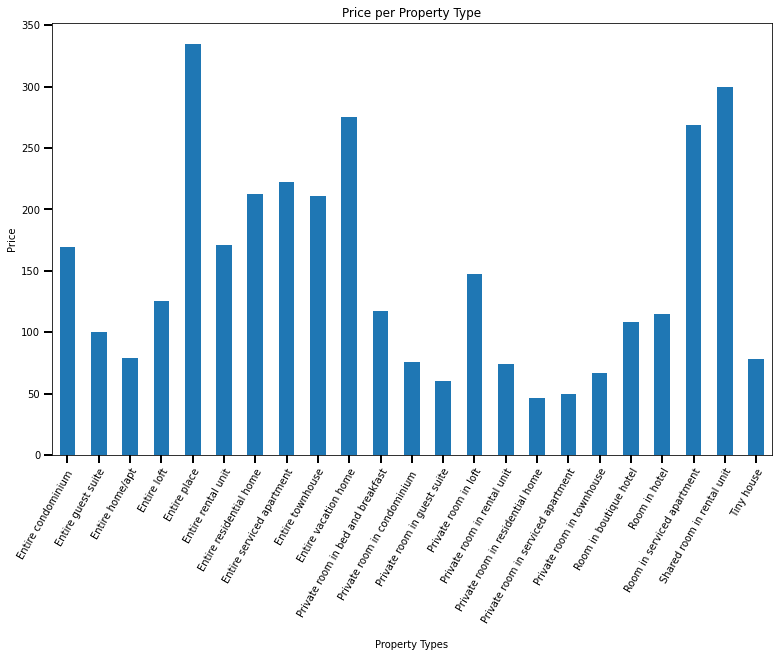

In [64]:
grouped_by_property_type = cleaned_airbnb_df.groupby(by=['property_type']).mean().reset_index()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([.1, .1, 1, 1])

grouped_by_property_type.price.plot.bar()

ax.set_xticks(range(len(grouped_by_property_type.property_type.unique())))
ax.set_xticklabels(grouped_by_property_type.property_type, rotation=60, ha='right', rotation_mode='anchor', fontsize='medium')
ax.set_title('Price per Property Type')
ax.set_ylabel('Price')
ax.set_xlabel('Property Types', labelpad=15)
ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

plt.show()


## With the columns all having some sort of data inside them , lets going in deph with the data visualizations  

## What are the most popular neighborhoods for Airbnb listings in Jersey City?

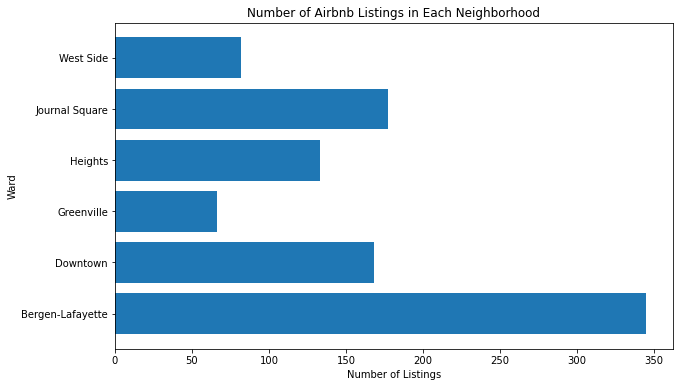

In [65]:

# group the data by neighborhood and count the number of listings in each neighborhood
neighborhood_counts = cleaned_airbnb_df.groupby('Ward')['id'].count().reset_index()

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(neighborhood_counts['Ward'], neighborhood_counts['id'], align='center')
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Ward')
ax.set_title('Number of Airbnb Listings in Each Neighborhood')
plt.show()

### As shown above it seems like by lisings Bergen-Lafayette is the most popular

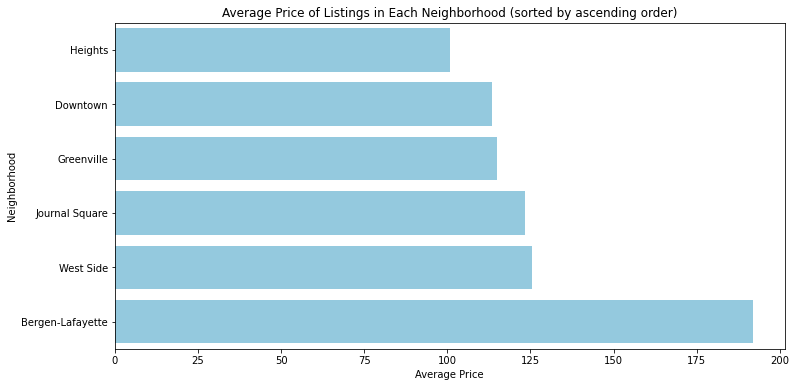

In [66]:
# Group by neighborhood and calculate the mean price
grouped_by_neighborhood = cleaned_airbnb_df.groupby(by=['Ward']).mean().reset_index()

# Sort by average price in ascending order
grouped_by_neighborhood = grouped_by_neighborhood.sort_values(by='price')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='price', y='Ward', data=grouped_by_neighborhood, ax=ax, color='skyblue')
ax.set_xlabel('Average Price')
ax.set_ylabel('Neighborhood')
ax.set_title('Average Price of Listings in Each Neighborhood (sorted by ascending order)')
plt.show()

### From the figure above it seems Bergen-Lafyette has the highest average price rate  

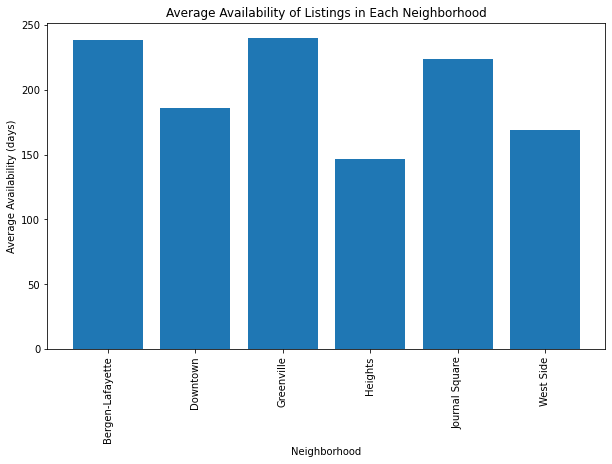

In [67]:
grouped_by_neighborhood = cleaned_airbnb_df.groupby(by=['Ward']).mean().reset_index()

# Create a bar chart showing the mean availability for each neighborhood
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(grouped_by_neighborhood['Ward'], grouped_by_neighborhood['availability_365'])
ax.set_xticklabels(grouped_by_neighborhood['Ward'], rotation=90)
ax.set_ylabel('Average Availability (days)')
ax.set_xlabel('Neighborhood')
ax.set_title('Average Availability of Listings in Each Neighborhood')
plt.show()

### so after checking which neighborhood's have the most average availability it seems like Bergen-Lafayatte is tied with Greenville 

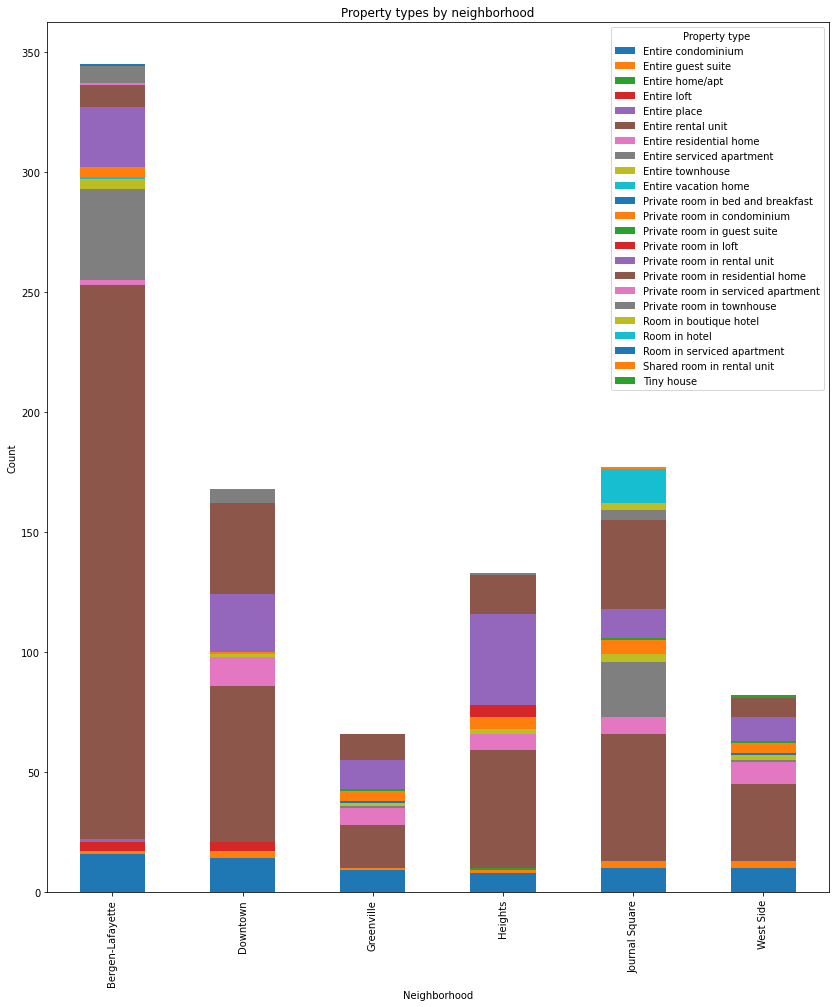

In [68]:
property_type_pivot = pd.pivot_table(cleaned_airbnb_df, index='Ward', columns='property_type', values='id', aggfunc='count', fill_value=0)
property_type_pivot = property_type_pivot.reindex(sorted(property_type_pivot.columns), axis=1)
property_type_pivot.plot(kind='bar', stacked=True, figsize=(14,16))
plt.title('Property types by neighborhood')
plt.ylabel('Count')
plt.xlabel('Neighborhood')
plt.legend(title='Property type', bbox_to_anchor=(1,1))

<ipython-input-81-30157f9563b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_airbnb_df['property_grouped'] = cleaned_airbnb_df['property_type'].replace(less_frequent_properties, 'Other')


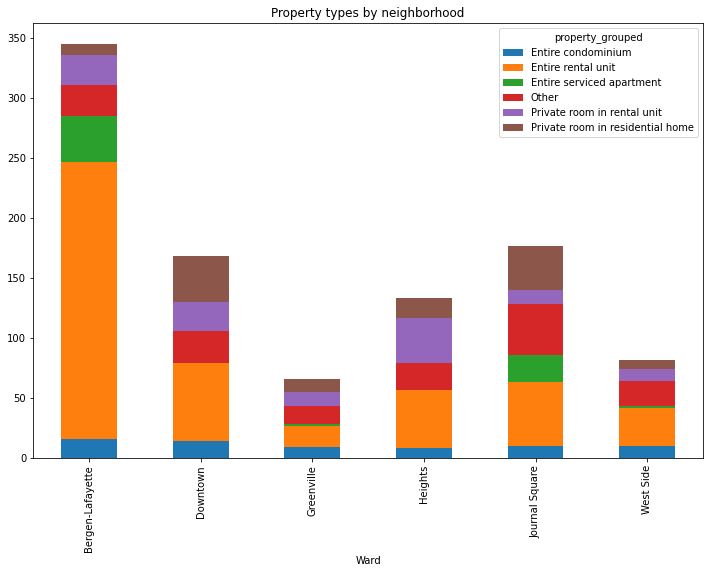

In [81]:
# Create a new column that groups less frequent property types into "other"
property_counts = cleaned_airbnb_df['property_type'].value_counts()
less_frequent_properties = property_counts[property_counts < 50].index
cleaned_airbnb_df['property_grouped'] = cleaned_airbnb_df['property_type'].replace(less_frequent_properties, 'Other')

# Plot the stacked bar chart using the new "property_grouped" column
grouped_by_neighborhood = cleaned_airbnb_df.groupby(by=['Ward', 'property_grouped']).size().unstack(fill_value=0)
grouped_by_neighborhood.plot(kind='bar', stacked=True, figsize=(12,8), title='Property types by neighborhood')


### As shown in the first count of property types stacked bar chart, there are 23 different property types, making it difficult to distinguish between them. To improve readability and make it easier to distinguish between each neighborhood, I grouped all property types that appear less than 50 times into an "other" category.

# Answer to the question: What are the most popular neighborhoods for Airbnb listings in Jersey City

_After analyzing the graphs, it is evident that Bergen-Lafayette has the highest number of listings with 349, which is double the count of the second-highest neighborhood, Journal Square. The average price of listings in Bergen-Lafayette is around 190 dollars, which is about 65 dollars more than the second-highest neighborhood, Westside. Additionally, Bergen-Lafayette has the most availability among all neighborhoods. In terms of popularity, Bergen-Lafayette emerges as the clear winner since it has the most number of listings despite having one of the highest prices and availability. On the other hand, Greenville is the least popular neighborhood based on the same metrics._

# moving onto question 2:Is there a correlation between the price of a listing and the number of reviews it has received?

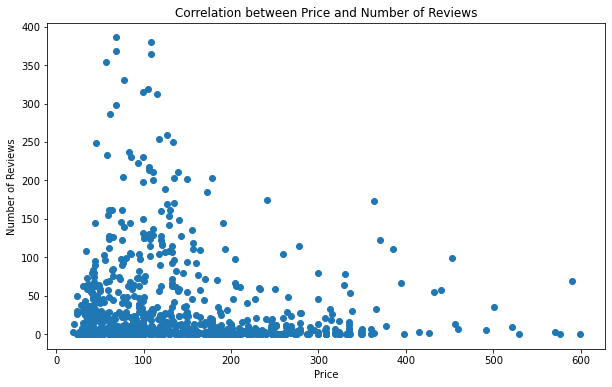

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

# create a scatter plot
plt.scatter(cleaned_airbnb_df['price'], cleaned_airbnb_df['number_of_reviews'])

# add labels and title
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Price and Number of Reviews')

# display the plot
plt.show()

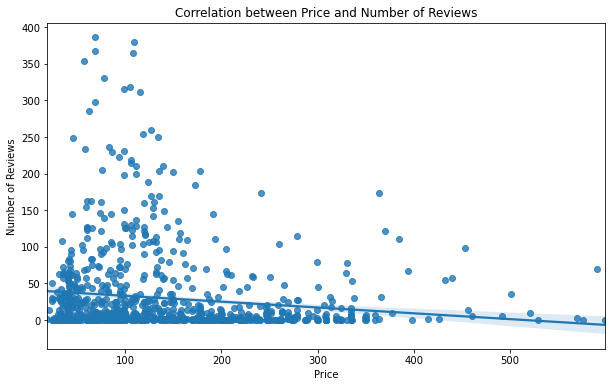

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x='price', y='number_of_reviews', data=cleaned_airbnb_df)
# add labels and title
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Correlation between Price and Number of Reviews')

# display the plot
plt.show()

Based on the scatter plot and accompanying regression line, it appears that there is no significant correlation between the price of a listing and the number of reviews it has received.

Text(0, 0.5, 'Number of Reviews')

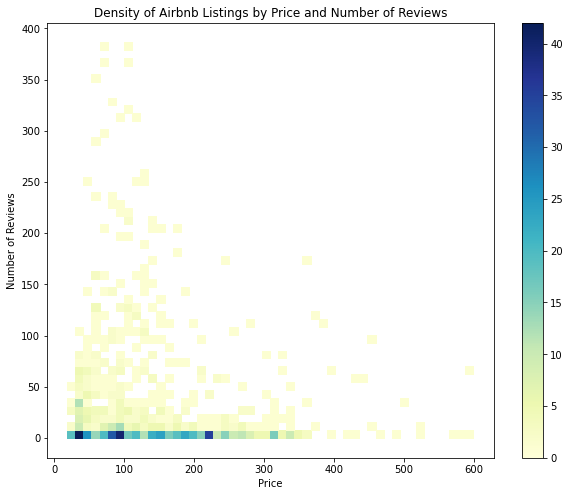

In [82]:
fig, ax = plt.subplots(figsize=(10, 8))


# create a subset of the dataframe with only the price and number of reviews columns
subset = cleaned_airbnb_df[['price', 'number_of_reviews']]

# create a heatmap with a color gradient showing the density of points
sns.histplot(data=subset, x='price', y='number_of_reviews', bins=50, cmap='YlGnBu', cbar=True)

# set the title and axis labels
plt.title('Density of Airbnb Listings by Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')


Based on the heatmap, there doesn't appear to be a strong correlation between the price of a listing and the number of reviews it has received.

# Answer to the question:Is there a correlation between the price of a listing and the number of reviews it has received?

## _After Analysing the scatter and heatmap it seems like there is any correlation much less a strong one between the number of reviews and price, which could mean_ 
1. that the price of the listing is not a significant factor in the number of reviews it receives. 
2. Other factors, such as the location, amenities, and overall quality of the listing, may be more important in determining the number of reviews. 
3. It could also suggest that guests are not necessarily willing to pay more for a listing based on the number of reviews it has received.

## Moving onto the Final question: How do the amenities and features of Jersey City Airbnb listings, such as the presence of a pool, gym, or free parking, impact the price and popularity of the listing?

I will have to first create a list of all the amenities and how often they are represented in each listing

Now that we have the count of each amenity, we can create a bar chart or pie chart to visualize the data. Here's some code to create a pie chart:

horizontal bar chart:

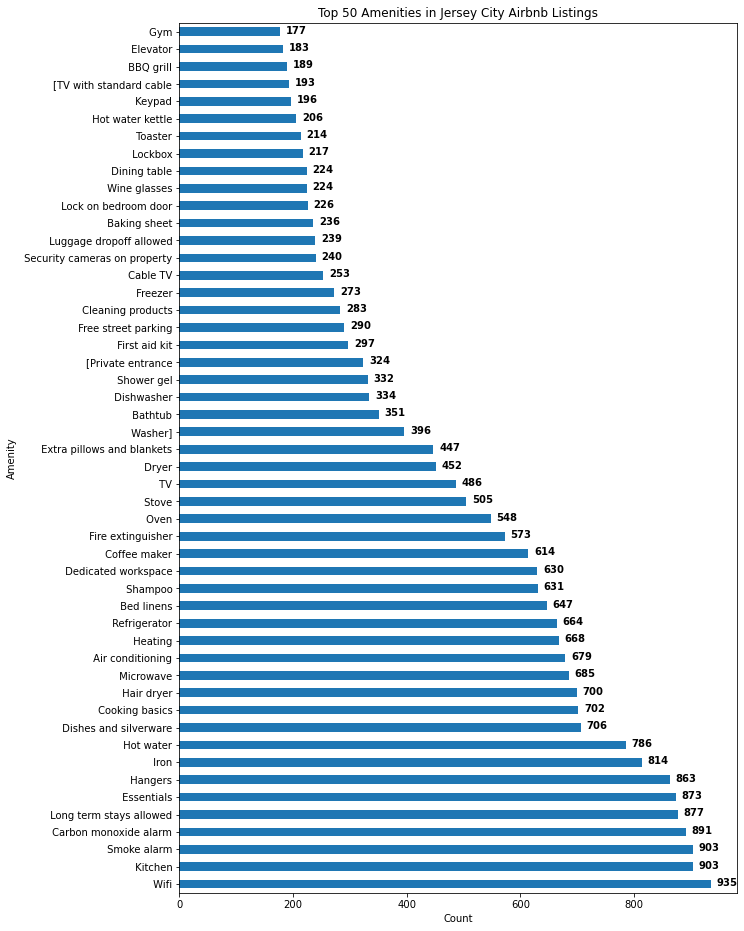

In [83]:
amenities = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).stack().value_counts()[:50]

ax = amenities.plot(kind='barh', figsize=(10,16))

# add count labels to each bar
for i, v in enumerate(amenities):
    ax.text(v + 10, i - 0.1, str(v), color='black', fontweight='bold')

# set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Amenity')
ax.set_title('Top 50 Amenities in Jersey City Airbnb Listings')

# display the chart
plt.show()

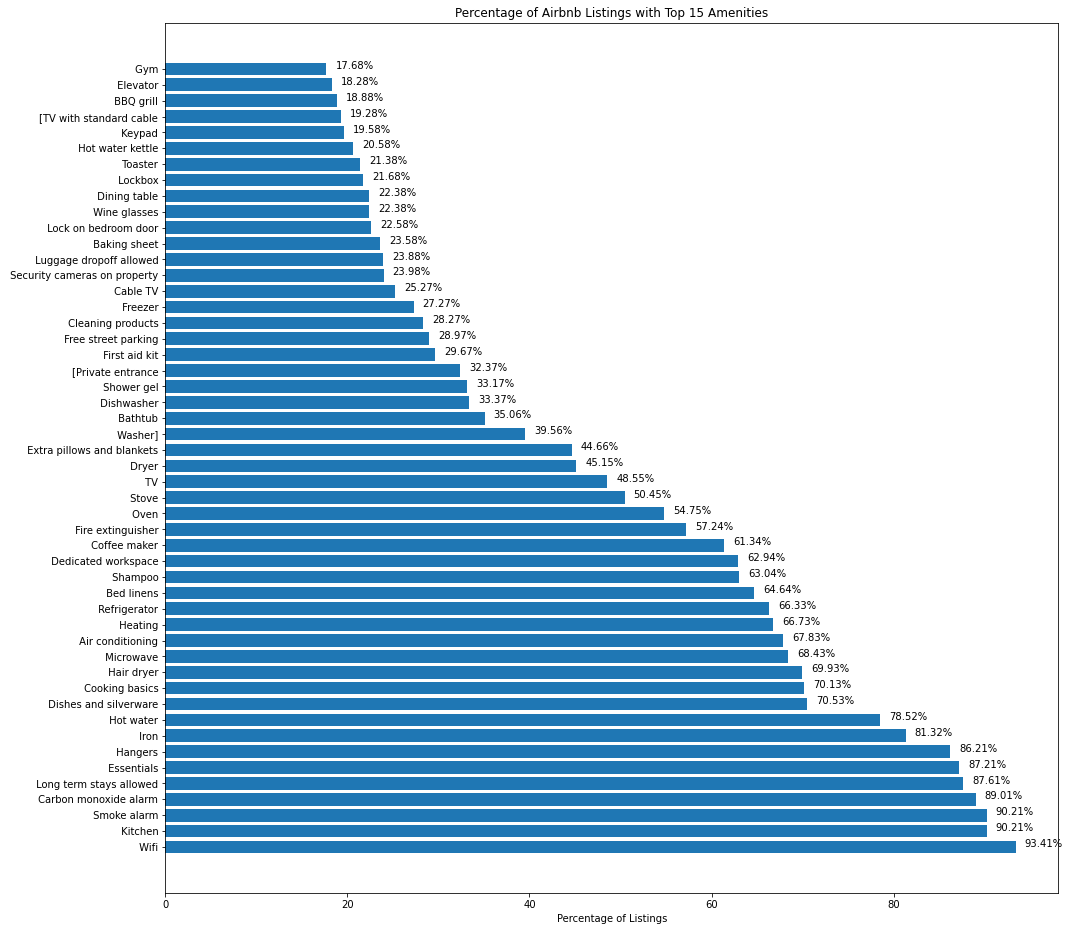

In [84]:
# calculate percentage of listings with each amenity
amenity_percentages = amenities / len(df) * 100

# create horizontal bar chart
fig, ax = plt.subplots(figsize=(16,16))
ax.barh(amenity_percentages.index, amenity_percentages)

# add percentage labels to each bar
for i, v in enumerate(amenity_percentages):
    ax.text(v + 1, i, f'{v:.2f}%', color='black', fontsize=10)

# set axis label and title
ax.set_xlabel('Percentage of Listings')
ax.set_title('Percentage of Airbnb Listings with Top 15 Amenities')

# display the plot
plt.show()

As depicted in the above figures, the count and percentage of each amenity are presented. Limiting the analysis to the 50 most common amenities provides a good range to explore the impact of amenities and features on the price and popularity of Jersey City Airbnb listings.

### I will create a violin plot with a swarm plot overlay, and analyze the distribution of listings that have at least one of the top 50 amenities.

<ipython-input-122-7db437c7e2de>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['has_top_amenity'] = df_filtered['amenities'].str.contains(amenities_regex).astype(int)


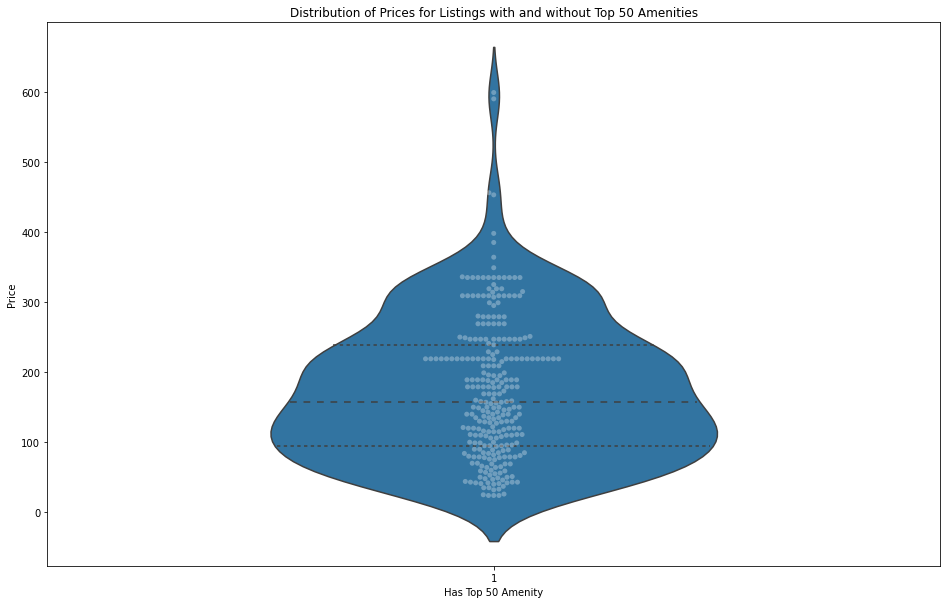

In [122]:
import re
import seaborn as sns

# filter the dataframe to include only the top 50 amenities
amenities = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).stack().value_counts()[:50].index
amenities_regex = '|'.join([re.escape(x) for x in amenities])
df_filtered = cleaned_airbnb_df[cleaned_airbnb_df['amenities'].str.contains(amenities_regex)]

# create a new column to indicate if the listing has any of the top 50 amenities
df_filtered['has_top_amenity'] = df_filtered['amenities'].str.contains(amenities_regex).astype(int)

# create the violin plot
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.violinplot(x='has_top_amenity', y='price', data=df_filtered, width=0.5, inner='quartile')

sns.swarmplot(x='has_top_amenity', y='price', data=df_filtered, color='white', alpha=0.3, ax=ax)


# add labels and title
plt.xlabel('Has Top 50 Amenity')
plt.ylabel('Price')
plt.title('Distribution of Prices for Listings with and without Top 50 Amenities')

# show the plot
plt.show()


Instead of including the inner quartile box , I will instead use the line representation so indicate where the minium, average, and maximum are

After analyzing the violin plot, a few conclusions can be drawn. Firstly, it appears that all listings in the dataset have at least one of the top 50 amenities, as there is no value of 0 on the x-axis. Secondly, the distribution of prices for listings with these amenities is right-skewed, indicating the presence of extreme outliers. Finally, by using a line representation instead of the inner quartile box, we can observe that the average price for listings with top amenities is higher than that of listings without them, and the maximum price is significantly higher. Overall, the violin plot suggests that having at least one of the top 50 amenities can have a significant impact on the pricing of an Airbnb listing.

<ipython-input-126-4c6692770b63>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['has_top_amenity'] = df_filtered['amenities'].str.contains(amenities_regex).astype(int)


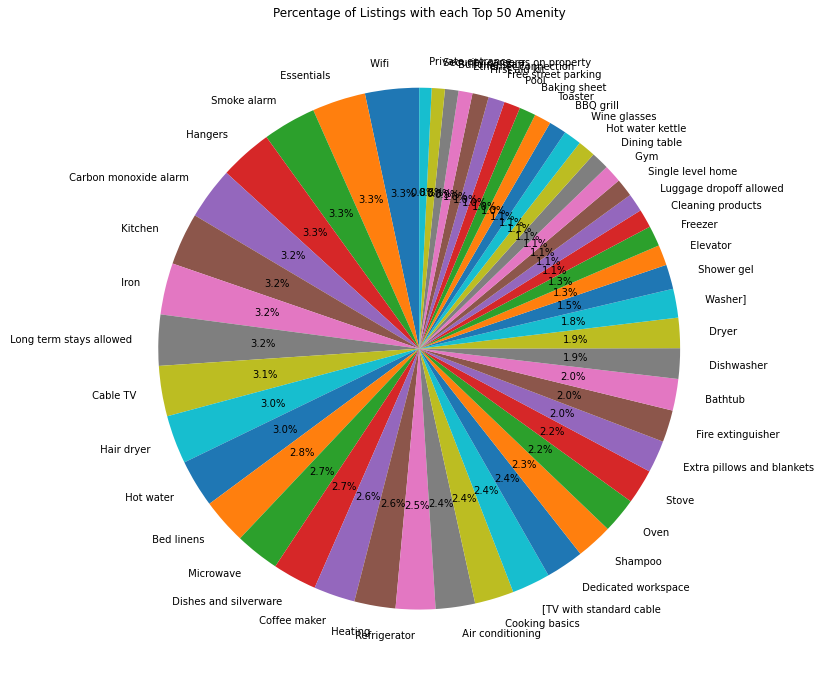

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

# filter the dataframe to include only the top 50 amenities
amenities = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).stack().value_counts()[:50].index
amenities_regex = '|'.join([re.escape(x) for x in amenities])
df_filtered = cleaned_airbnb_df[cleaned_airbnb_df['amenities'].str.contains(amenities_regex)]

# create a new column to indicate if the listing has any of the top 50 amenities
df_filtered['has_top_amenity'] = df_filtered['amenities'].str.contains(amenities_regex).astype(int)

# create a dataframe with the count of each top amenity
amenities_count = df_filtered['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).stack().value_counts()[:50]

# create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(amenities_count.values, labels=amenities_count.index, autopct='%1.1f%%', startangle=90)

# add title
plt.title('Percentage of Listings with each Top 50 Amenity')

# show the plot
plt.show()


While the pie chart above provides a clear visualization of the top 50 amenities and their respective frequencies in the filtered dataframe, visualizing every single amenity across the entire dataset would result in a pie chart that could be difficult to interpret. Therefore, focusing on the top 50 amenities provides a more meaningful and manageable representation of the amenities offered by the Airbnb listings.

<ipython-input-133-119696a7e2eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_airbnb_df['amenities_count'] = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).count(axis=1)


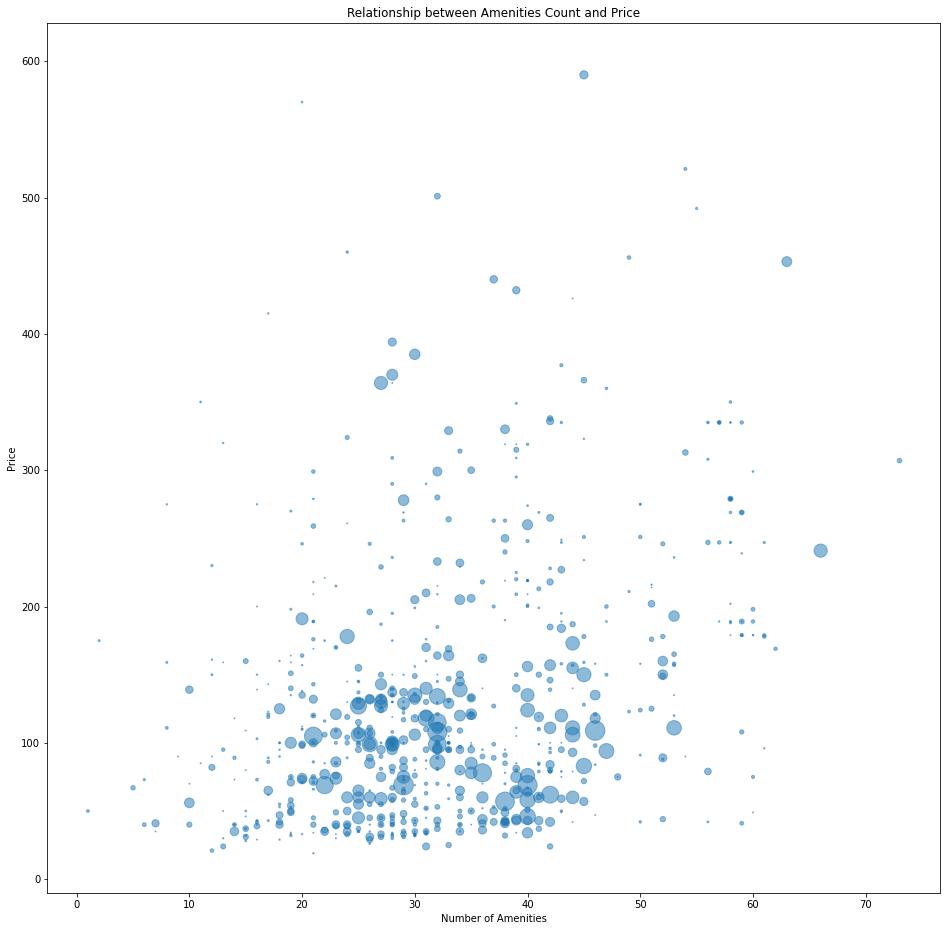

In [133]:
import matplotlib.pyplot as plt

# Create a new column to count the number of amenities
cleaned_airbnb_df['amenities_count'] = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).count(axis=1)

# Create a scatter plot with amenities count on the x-axis and price on the y-axis
plt.figure(figsize=(16, 16))
plt.scatter(x=cleaned_airbnb_df['amenities_count'], y=cleaned_airbnb_df['price'], s=cleaned_airbnb_df['number_of_reviews'], alpha=0.5)

# Add title and axis labels
plt.title('Relationship between Amenities Count and Price')
plt.xlabel('Number of Amenities')
plt.ylabel('Price')

# Show the plot
plt.show()


a cluster of points between 20 to 45 amount of amenities and 35 dollars to 150 dollars suggests that there may be a correlation between the number of amenities and the price of the listing. It could indicate that listings with a higher number of amenities tend to have a higher price, or that listings with a higher price tend to offer more amenities. However, it's important to note that  _correlation_ does not necessarily imply _Causation_ , and further analysis would be needed to establish a causal relationship between the two variables.

To delve deeper into this analysis, I will also include the neighborhood information to investigate if there are any variations in the relationship between the number of amenities, price, and popularity among different neighborhoods.

<ipython-input-155-a61cd7742e04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_airbnb_df['amenities_count'] = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).count(axis=1)


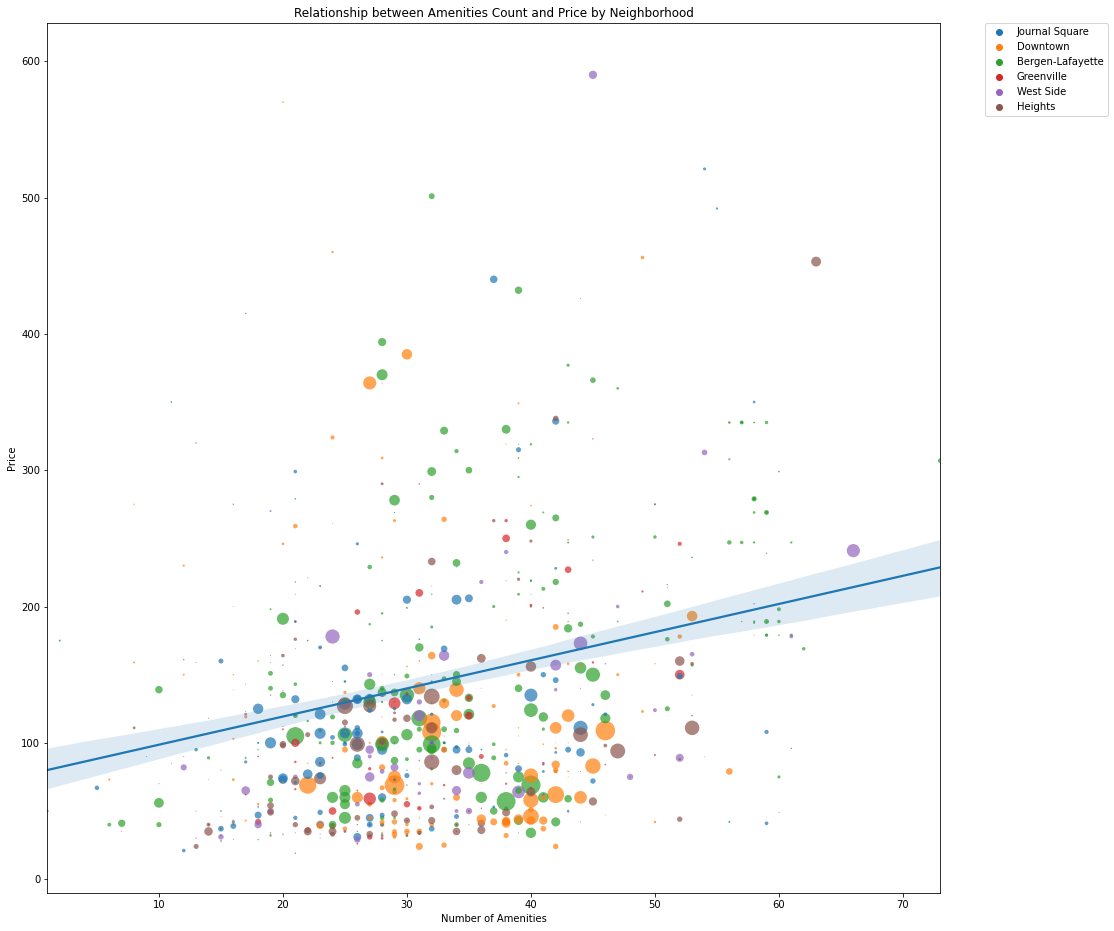

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to count the number of amenities
cleaned_airbnb_df['amenities_count'] = cleaned_airbnb_df['amenities'].str.strip('{}').str.replace('"', '').str.split(',', expand=True).count(axis=1)

# Create a scatter plot with amenities count on the x-axis, price on the y-axis, and hue as the neighborhood
plt.figure(figsize=(16, 16))
sns.scatterplot(x='amenities_count', y='price', hue='Ward', data=cleaned_airbnb_df, s=cleaned_airbnb_df['number_of_reviews'], alpha=0.7)

# Add a regression line
sns.regplot(x='amenities_count', y='price', data=cleaned_airbnb_df, scatter=False)

# Add title and axis labels
plt.title('Relationship between Amenities Count and Price by Neighborhood')
plt.xlabel('Number of Amenities')
plt.ylabel('Price')

# Show the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


In the scatter plot, the size of each dot represents the number of reviews for each listing. So, listings with more reviews are represented by larger dots. If we focus on the same clusters as before, we can see that listings in the 'Downtown' neighborhood have the largest dots. This could be due to many reasons, but previous visualizations from questions 1 and 2 have shown that Downtown has the second-lowest average listing price and the third-most amount of listings. Additionally, it has the third-lowest average availability. It's worth noting that a regression line added to the scatter plot shows a slight positive correlation between the number of amenities and price.

## Now that we have gained insights from the data through exploratory data analysis and visualizations, it's time to move on to the modeling phase of the CRISP-DM process. The goal of the modeling phase is to create a predictive model that can help us understand the relationship between various features and the price of an Airbnb listing. To begin this phase, we will first prepare our data by dropping irrelevant columns and converting data types as needed.

In [175]:
cleaned_airbnb_df.columns

Index(['id', 'neighbourhood', 'Ward', 'latitude', 'longitude', 'price',
       'number_of_reviews', 'review_scores_rating', 'amenities',
       'host_response_time', 'host_is_superhost', 'bedrooms', 'beds',
       'property_type', 'room_type', 'instant_bookable', 'availability_365',
       'amenities_count', 'zscore', 'property_grouped'],
      dtype='object')

In [176]:
# drop the unnecessary columns
model_data = cleaned_airbnb_df.drop(columns=['id', 'neighbourhood', 'latitude', 'longitude',
                                             'amenities', 'instant_bookable', 'availability_365',
                                             'bedrooms', 'beds', 'property_type', 'review_scores_rating','zscore'])

# drop any rows with missing values
model_data = model_data.dropna()

# check the resulting dataframe
print(model_data.head())


             Ward  price  number_of_reviews  host_response_time  \
0  Journal Square    128                 10  a few days or more   
1        Downtown    111                137      within an hour   
2        Downtown    109                380      within an hour   
3        Downtown     46                249      within an hour   
4        Downtown     62                286      within an hour   

  host_is_superhost        room_type  amenities_count    property_grouped  
0                 f     Private room               45               Other  
1                 t  Entire home/apt               42               Other  
2                 f  Entire home/apt               46  Entire rental unit  
3                 f     Private room               40               Other  
4                 f     Private room               42               Other  


In [164]:
model_data.columns

Index(['Ward', 'price', 'number_of_reviews', 'host_response_time',
       'host_is_superhost', 'property_type', 'room_type', 'amenities_count'],
      dtype='object')

I decided to keep 'property_grouped' and drop 'property_type' because there are 24 different property types, whereas 'property_grouped' only has 6. Since both columns are string types, I will need to use OneHotEncoder to convert them into numerical values that can be used by the machine learning algorithm.

In [245]:
model_data

,Ward,price,number_of_reviews,host_response_time,host_is_superhost,room_type,amenities_count,property_grouped
0,Journal Square,128,10,a few days or more,f,Private room,45,Other
1,Downtown,111,137,within an hour,t,Entire home/apt,42,Other
2,Downtown,109,380,within an hour,f,Entire home/apt,46,Entire rental unit
3,Downtown,46,249,within an hour,f,Private room,40,Other
4,Downtown,62,286,within an hour,f,Private room,42,Other
...,...,...,...,...,...,...,...,...
995,Bergen-Lafayette,100,0,within a few hours,f,Entire home/apt,14,Entire rental unit
997,Bergen-Lafayette,129,2,within an hour,f,Entire home/apt,32,Entire rental unit
998,Journal Square,191,0,within an hour,f,Entire home/apt,31,Entire serviced apartment
999,Bergen-Lafayette,216,2,within an hour,t,Entire home/apt,51,Entire condominium


to find the best machine learning algorithm to answer this question, i will create a piple line to return the best scored one.

In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [259]:
# Define the columns to use in the pipeline
numeric_cols = ['number_of_reviews', 'amenities_count']
categorical_cols = ['Ward', 'host_response_time', 'host_is_superhost', 'property_grouped', 'room_type']

# Create the preprocessor to scale numerical columns and one-hot encode categorical columns
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

# Define the pipeline to use linear regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Define the parameters to search for the linear regression model
parameters = {'regressor__normalize': [True, False]}

# Split the data into train and test sets
X = model_data.drop(['price'], axis=1)
y = model_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)
gboost_model = GradientBoostingRegressor(random_state=42)
knn_model = KNeighborsRegressor()

# Define ensemble model
voting_model = VotingRegressor(estimators=[
    ('linear', linear_model),
    ('tree', tree_model),
    ('forest', forest_model),
    ('gboost', gboost_model),
    ('knn', knn_model)
])

# Define pipeline for each model
linear_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', linear_model)])
tree_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', tree_model)])
forest_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', forest_model)])
gboost_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', gboost_model)])
knn_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', knn_model)])
voting_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', voting_model)])

# Train and evaluate each model
models = [('Linear Regression', linear_pipe),
          ('Decision Tree', tree_pipe),
          ('Random Forest', forest_pipe),
          ('Gradient Boosting', gboost_pipe),
          ('K-Nearest Neighbors', knn_pipe),
          ('Ensemble', voting_pipe)]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print()
    print(f'{name} MSE: {mse:.2f}')
    print(f'{name} RMSE: {rmse:.2f}')
    print(f'{name} MAE: {mae:.2f}')
    print(f'{name} R2 Score: {r2:.2f}')
    print()


Linear Regression MSE: 6464.54
Linear Regression RMSE: 80.40
Linear Regression MAE: 55.34
Linear Regression R2 Score: 0.36


Decision Tree MSE: 11666.54
Decision Tree RMSE: 108.01
Decision Tree MAE: 64.05
Decision Tree R2 Score: -0.16


Random Forest MSE: 7160.33
Random Forest RMSE: 84.62
Random Forest MAE: 54.83
Random Forest R2 Score: 0.29


Gradient Boosting MSE: 6657.30
Gradient Boosting RMSE: 81.59
Gradient Boosting MAE: 54.64
Gradient Boosting R2 Score: 0.34


K-Nearest Neighbors MSE: 7418.77
K-Nearest Neighbors RMSE: 86.13
K-Nearest Neighbors MAE: 55.67
K-Nearest Neighbors R2 Score: 0.26


Ensemble MSE: 6641.28
Ensemble RMSE: 81.49
Ensemble MAE: 54.02
Ensemble R2 Score: 0.34



In [260]:
price_stats = model_data['price'].describe()

# print the minimum and maximum values of the 'price' column
print('Minimum price:', price_stats['min'])
print('Maximum price:', price_stats['max'])

Minimum price: 19.0
Maximum price: 599.0
